In [1]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
statlog_heart = fetch_ucirepo(id=145)

# Data
X = statlog_heart.data.features
y = statlog_heart.data.targets['heart-disease'].replace({1: 0, 2: 1})  # 0=no, 1=yes

print(statlog_heart.metadata)
print(statlog_heart.variables)


{'uci_id': 145, 'name': 'Statlog (Heart)', 'repository_url': 'https://archive.ics.uci.edu/dataset/145/statlog+heart', 'data_url': 'https://archive.ics.uci.edu/static/public/145/data.csv', 'abstract': 'This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 270, 'num_features': 13, 'feature_types': ['Categorical', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['heart-disease'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C57303', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Cost Matrix\r\n\r\n_______\t abse  pres\r\nabsence\t 0\t1\r\npresence  5\t0\r\n\r\nwhere the rows represent the true values and the columns the p

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale numeric features (not required for trees but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Basic decision tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train_scaled, y_train)

y_pred_tree = dtree.predict(X_test_scaled)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        33
           1       1.00      0.67      0.80        21

    accuracy                           0.87        54
   macro avg       0.91      0.83      0.85        54
weighted avg       0.89      0.87      0.86        54

Confusion Matrix:
[[33  0]
 [ 7 14]]


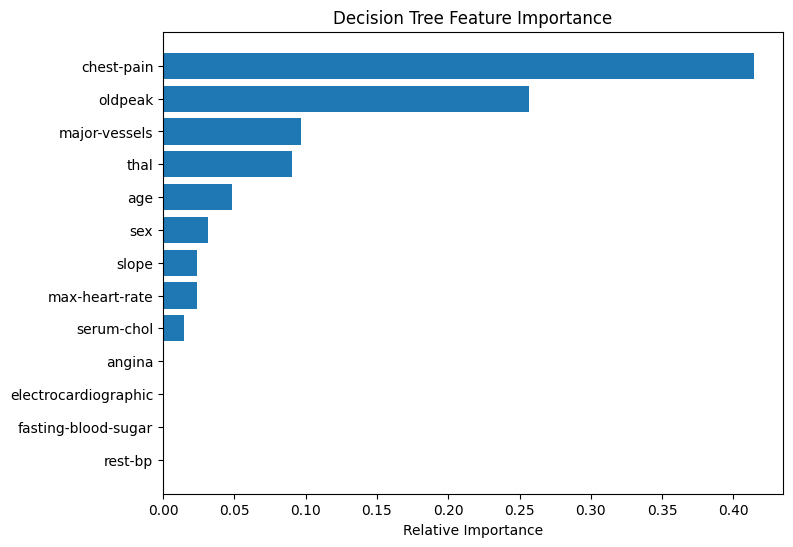

In [4]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Get importances
importances = dtree.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.title('Decision Tree Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with 100 trees
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.84      0.76      0.80        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54

Confusion Matrix:
[[30  3]
 [ 5 16]]


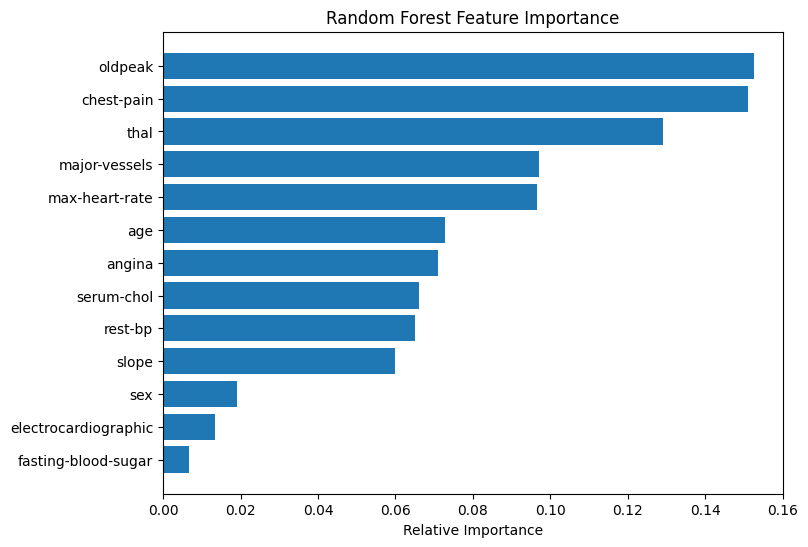

In [6]:
importances_rf = rf.feature_importances_
indices_rf = importances_rf.argsort()

plt.figure(figsize=(8, 6))
plt.title('Random Forest Feature Importance')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [feature_names[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()


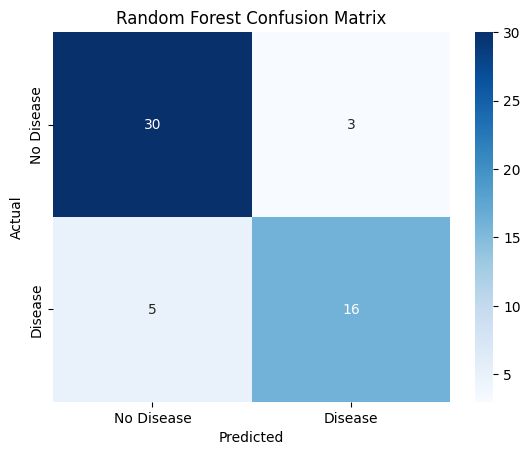

In [7]:
import seaborn as sns

cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
